___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset.

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning.

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables.
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with.

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase.

In the final step, you will deploy your model using ***Streamlit API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
-

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Import necessary libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score

# Set font size for all plots
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
# Set plot style
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)


In [ ]:
#connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
# Printing numerical summary for Time and Amount columns
df.loc[:, ['Time', 'Amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.859575,47488.145955,0.0,54201.5,84692.0,139320.500,172792.00
Amount,284807.0,88.349619,250.120109,0.0,5.6,22.0,77.165,25691.16


## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [ ]:
!pip install deepchecks -U --quiet

In [ ]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity
from deepchecks.tabular.suites import train_test_validation
from deepchecks.tabular.suites import model_evaluation

In [ ]:
label_name = 'Class'

In [ ]:
df_train, df_test = train_test_split(df, stratify=df[label_name], random_state=42)
train_ds = Dataset(df_train, label=label_name, cat_features=[])
test_ds = Dataset(df_test, label=label_name, cat_features=[])
result_train = data_integrity().run(train_ds)
result_train

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Data Integrity Suite

In [ ]:
result_test = data_integrity().run(test_ds)
result_test

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Data Integrity Suite

### Exploratory Data Analysis

In [ ]:
# To check if there is any null values present in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#Number of distinct categories or classes i.e., Fraudulent and Normal
df['Class'].nunique()

2

In [ ]:
 #number of instances per class
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

this data is imbalanced

0--> Normal Transaction

1--> Fraudulent Transaction

<Axes: >

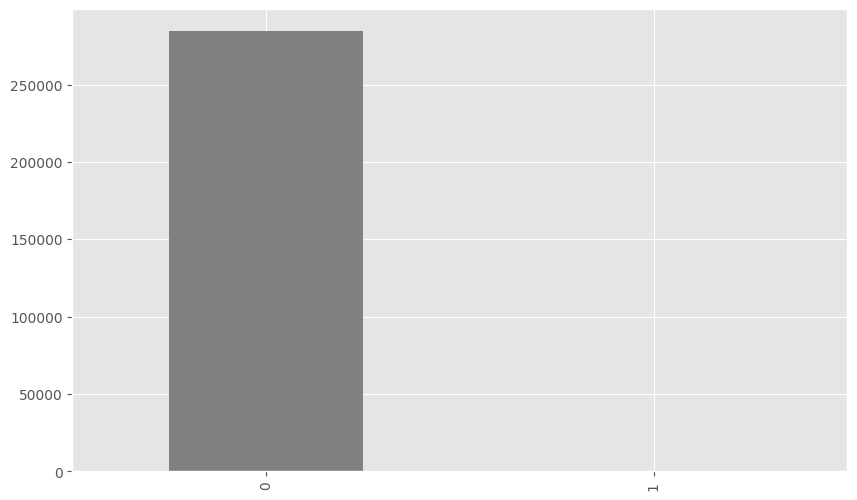

In [ ]:
#visual representation of instances per class
df.Class.value_counts().plot.bar(color=['grey', 'orange'])

This gives a visual representation of the class imbalance. The below plot after PCA gives a better visualization of the imbalnce in the datasets.

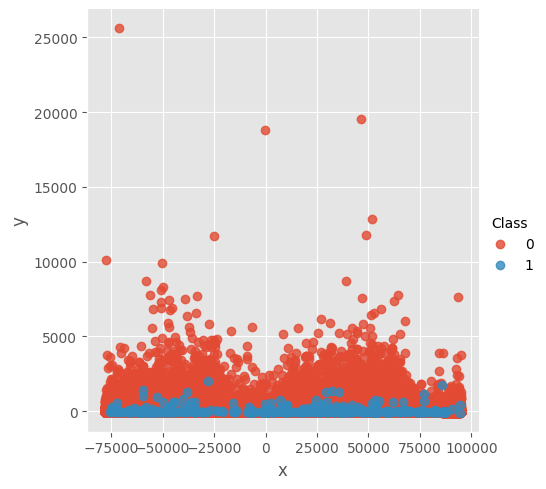

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Before sampling (PCA is performed for visualization only)
pca = PCA(n_components=2)
creditcard_2d = pd.DataFrame(pca.fit_transform(df.iloc[:, 0:30]))
creditcard_2d = pd.concat([creditcard_2d, df['Class']], axis=1)
creditcard_2d.columns = ['x', 'y', 'Class']

sns.lmplot(x='x', y='y', data=creditcard_2d, fit_reg=False, hue='Class')
plt.show()


In [ ]:
#Descriptive Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#checking the percentage of each class in the dataset
(df.Class.value_counts())/(df.Class.count())

0    0.998273
1    0.001727
Name: Class, dtype: float64

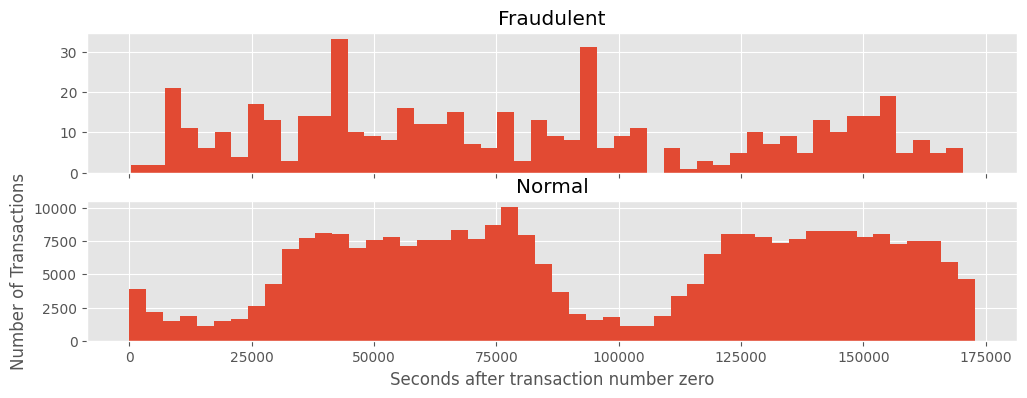

In [ ]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(df["Time"][df["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(df["Time"][df["Class"] == 0], bins = 50)
ax2.set_title('Normal')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
#separating data
normal=df[df.Class==0]
fraud=df[df.Class==1]

In [ ]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Data Cleaning
Check Missing Values and Outliers

In [ ]:
print('Missing Value   : ', df.isna().sum().sum())

Missing Value   :  0


In [ ]:
print('Duplicated Rows : ', df.duplicated().sum())

Duplicated Rows :  1081


In [ ]:
print('Normal transactions Duplicated Rows : ', df[df["Class"] == 0].duplicated().sum())

Normal transactions Duplicated Rows :  1062


In [ ]:
print('Fraud Duplicated Rows : ', df[df["Class"] == 1].duplicated().sum())

Fraud Duplicated Rows :  19


In [ ]:
# Only Class = 0 duplicated values dropping. Because We need Class = 1 values.

Normal_dup_index = df[(df["Class"] == 0) & (df.duplicated(keep='first'))].index
df.drop(index=Normal_dup_index, inplace=True)

In [ ]:
print('Normal transactions Duplicated Rows : ', df[df["Class"] == 0].duplicated().sum())

Normal transactions Duplicated Rows :  0


<Axes: >

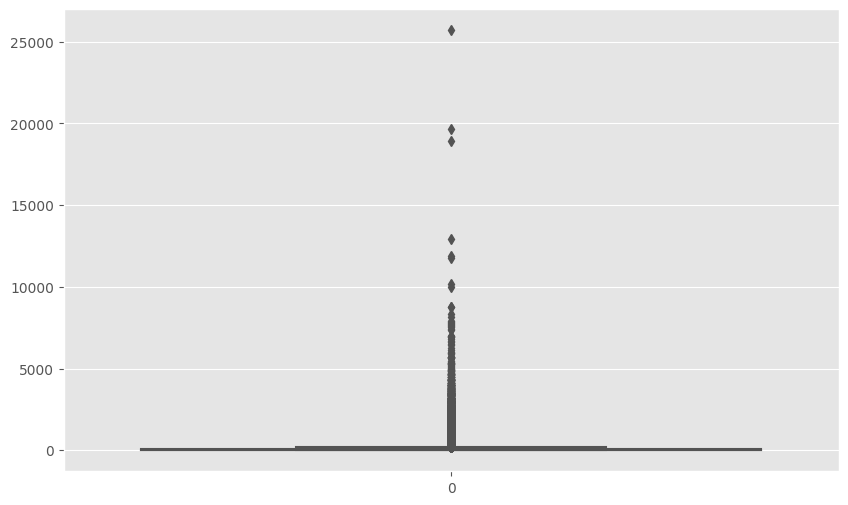

In [ ]:
sns.boxplot(df['Amount'])

In [ ]:
from scipy.stats import iqr

upper_limit = df.Amount.quantile(0.75) + (1.5*iqr(df.Amount) )
print(upper_limit)

print(df[df.Amount>upper_limit]['Class'].value_counts())


185.39999999999998
0    31597
1       91
Name: Class, dtype: int64


In [ ]:
df = df[df.Amount<=8000]
print(df['Class'].value_counts())

0    283241
1       492
Name: Class, dtype: int64


<Axes: >

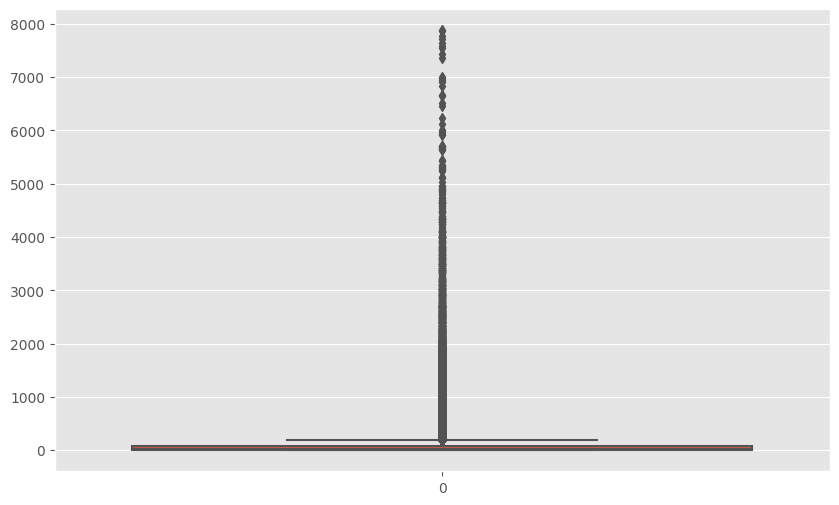

In [ ]:
sns.boxplot(df['Amount'])

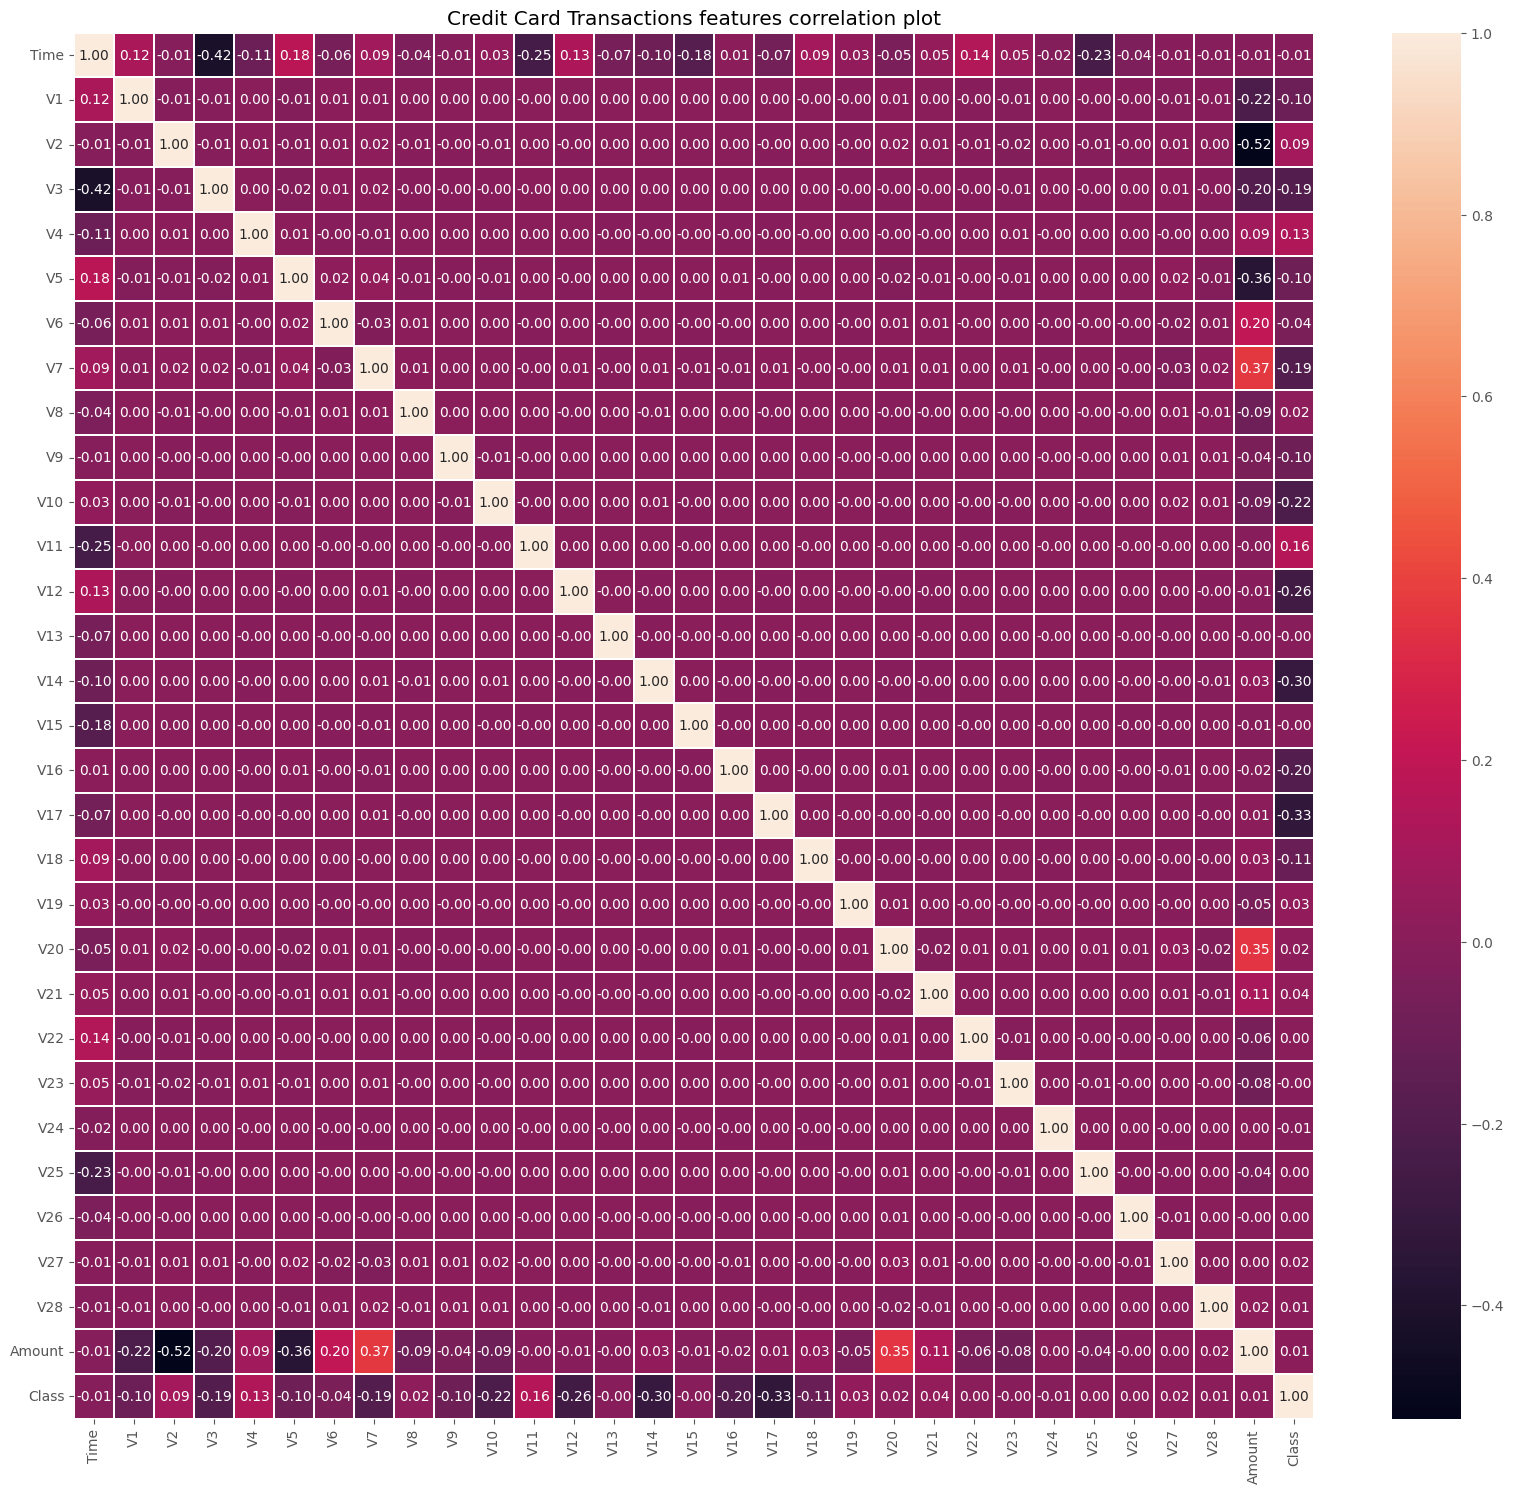

In [ ]:
plt.figure(figsize = (20,18))
plt.title('Credit Card Transactions features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,fmt='.2f', annot=True)
plt.show()

---
---


## 2. Data Preprocessing

#### Train - Test Split

In [ ]:
X = df.drop(columns='Class', axis=1)
y = df['Class']

Under-Sampling

number of Fraudulent transactions --> 492


In [ ]:
# Instantiate RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

# Undersample
X_under, y_under = undersample.fit_resample(X, y)



In [ ]:
y_under.value_counts()

0    492
1    492
Name: Class, dtype: int64

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques.

### Logistic Regression

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

In [ ]:
# Split data into training, and test sets, ensuring the class distribution is maintained
X_train, X_test, y_train, y_test = train_test_split(X, y , stratify=y, test_size=0.2 , random_state=42)


***i. Import Libraries***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

***ii. Model Training***

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

0    226592
1       394
Name: Class, dtype: int64

0    56649
1       98
Name: Class, dtype: int64


In [ ]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

***iii. Prediction and Model Evaluating  and Tuning***

In [ ]:
y_pred = pipe_model.predict(X_test)
y_train_pred = pipe_model.predict(X_train)

In [ ]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[9.99881145e-01, 1.18854812e-04],
       [9.99726902e-01, 2.73097813e-04],
       [9.99981989e-01, 1.80114584e-05],
       ...,
       [9.99985551e-01, 1.44489113e-05],
       [9.99753097e-01, 2.46903200e-04],
       [9.99390745e-01, 6.09254700e-04]])

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,pred,pred_proba
53349,45933.0,1.355588,-1.372417,0.732429,-1.455647,-1.789064,-0.250979,-1.363596,0.080924,-1.705419,...,0.027950,-0.039736,0.125811,-0.297955,0.036233,0.027559,71.40,0,0,0.000034
245596,152819.0,-1.554734,0.192476,0.627004,-2.857962,0.408065,1.052658,-0.044063,0.946908,0.517252,...,-0.310487,-1.563841,-0.115870,0.650874,0.132185,-0.002876,69.00,0,0,0.000053
52984,45752.0,-0.633762,0.116043,2.952224,0.979467,-0.885711,1.295048,-0.464558,0.675508,0.932822,...,-0.124995,0.249201,-0.026381,-0.281868,0.161717,0.069094,38.85,0,0,0.001845
250077,154715.0,1.648275,-0.547351,-1.884999,0.596254,-0.131292,-1.141140,0.280607,-0.176508,0.567533,...,-0.154426,-0.084360,0.071174,-0.134486,-0.048553,-0.013206,184.63,0,0,0.000852
109012,71174.0,-0.268170,1.092975,0.145188,-0.311012,0.533365,0.045413,0.303144,0.416822,-0.896954,...,-0.237762,-0.974251,-0.063497,0.355013,-0.110266,-0.053454,1.50,0,0,0.000119
80446,58492.0,-0.828876,-1.271519,0.731411,-2.039242,-2.127345,-0.703179,-0.257184,0.299237,-2.029728,...,0.709591,0.328493,-1.016077,-0.410433,0.065463,0.145660,254.00,0,0,0.000113
238136,149539.0,0.108620,1.112686,-0.194793,-0.453318,0.810782,-0.991859,1.029968,-0.167513,-0.222945,...,0.143318,1.009600,-0.464571,0.086287,0.232776,0.090315,1.79,0,0,0.000244
234654,148062.0,2.148793,-0.074148,-2.573271,-0.337774,1.000884,-0.596480,0.502482,-0.201752,0.256162,...,-0.086485,-0.105701,0.457914,0.247133,-0.104048,-0.094671,1.90,0,0,0.000133
122820,76700.0,1.024623,-0.456396,1.204973,0.010250,-0.510032,1.399536,-0.988118,0.587363,0.955157,...,0.228432,-0.530327,-0.220929,1.097009,0.043585,0.004889,0.00,0,0,0.000283
70022,53676.0,-1.804302,1.024439,-1.420753,-1.232840,-9.344232,4.863378,7.077049,-1.278571,-0.965134,...,-0.757401,0.504663,-0.333094,-0.509996,0.260811,-0.745198,1600.00,0,0,0.000258


In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[56641     8]
 [   40    58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.88      0.59      0.71        98

    accuracy                           1.00     56747
   macro avg       0.94      0.80      0.85     56747
weighted avg       1.00      1.00      1.00     56747


Train_Set
[[226557     35]
 [   141    253]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226592
           1       0.88      0.64      0.74       394

    accuracy                           1.00    226986
   macro avg       0.94      0.82      0.87    226986
weighted avg       1.00      1.00      1.00    226986



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,3.186740,0.090618,0.916667,0.880769,0.564103,0.645070,0.698413,0.744715,0.999163,0.999231
2,1.861636,0.047414,0.862069,0.873563,0.641026,0.642254,0.735294,0.740260,0.999207,0.999217
3,1.660246,0.049481,0.913043,0.876923,0.525000,0.644068,0.666667,0.742671,0.999075,0.999227
4,1.703994,0.053893,0.900000,0.873518,0.675000,0.624294,0.771429,0.728171,0.999295,0.999192
5,1.577336,0.048679,0.851852,0.884615,0.575000,0.649718,0.686567,0.749186,0.999075,0.999246
6,1.645159,0.076458,0.933333,0.876448,0.700000,0.641243,0.800000,0.740620,0.999383,0.999222
7,2.882799,0.090414,0.840000,0.882129,0.538462,0.653521,0.656250,0.750809,0.999031,0.999246
8,3.447445,0.047149,0.800000,0.883268,0.717949,0.639437,0.756757,0.741830,0.999207,0.999227
9,1.658571,0.048897,0.823529,0.877395,0.717949,0.645070,0.767123,0.743506,0.999251,0.999227
10,1.510246,0.046918,0.900000,0.866142,0.692308,0.619718,0.782609,0.722496,0.999339,0.999173


In [ ]:
df_scores.mean()[2:] # no overfitting

test_precision     0.874049
train_precision    0.877477
test_recall        0.634679
train_recall       0.640439
test_f1            0.732111
train_f1           0.740426
test_accuracy      0.999203
train_accuracy     0.999221
dtype: float64

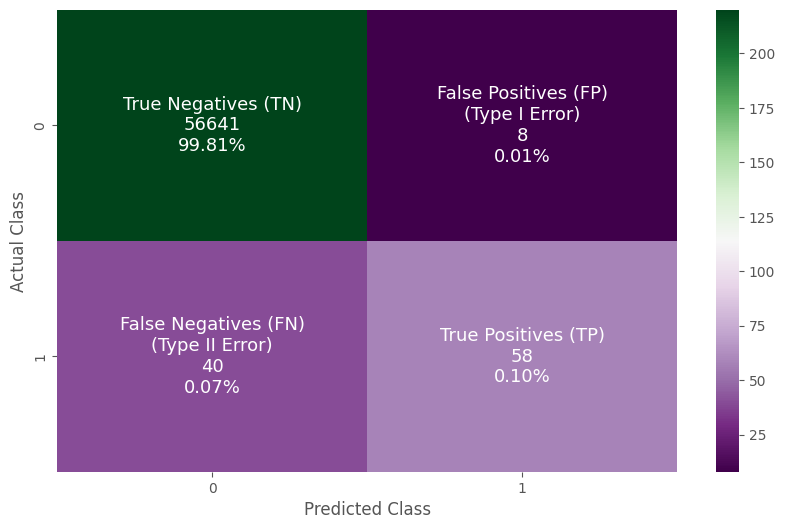

In [ ]:
plt.figure(figsize=(10,6))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)',
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='PRGn', vmax=220)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [ ]:
pip install scikit-plot

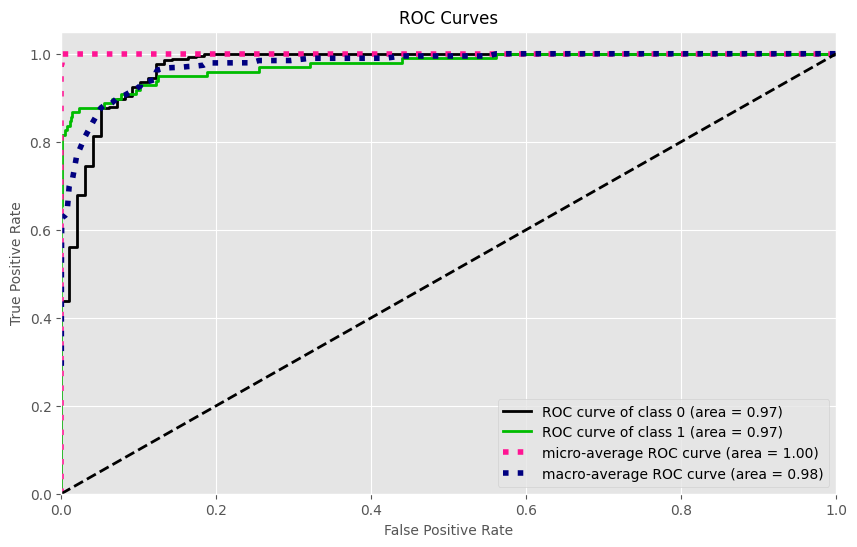

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

y_pred_proba = pipe_model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
average_precision_score(y_test, y_pred_proba[:,1])

0.7069692557215441

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Logistic Regression with Unbalanced Data Techniques

In [ ]:
# Split data into training, validation and test sets, ensuring the class distribution is maintained
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_under, y_under , stratify=y_under, test_size=0.2 , random_state=42)


***ii. Model Training***

In [ ]:
print(y_under.value_counts())
print()

0    492
1    492
Name: Class, dtype: int64



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train_re, y_train_re)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

***Prediction and Model Evaluating and Tuning***

In [ ]:
y_pred_lr = pipe_model.predict(X_test_re)
y_train_pred = pipe_model.predict(X_train_re)

In [ ]:
y_pred_proba_lr = pipe_model.predict_proba(X_test_re)
y_pred_proba_lr

array([[3.54550256e-07, 9.99999645e-01],
       [4.53179556e-08, 9.99999955e-01],
       [7.59110603e-01, 2.40889397e-01],
       [5.54580706e-06, 9.99994454e-01],
       [9.29343306e-01, 7.06566936e-02],
       [1.22024111e-06, 9.99998780e-01],
       [1.11983978e-10, 1.00000000e+00],
       [7.78019520e-03, 9.92219805e-01],
       [8.22432844e-01, 1.77567156e-01],
       [8.84266748e-01, 1.15733252e-01],
       [3.30649553e-07, 9.99999669e-01],
       [9.91947008e-01, 8.05299176e-03],
       [8.16188452e-01, 1.83811548e-01],
       [1.37918821e-02, 9.86208118e-01],
       [5.61777796e-02, 9.43822220e-01],
       [8.58748485e-01, 1.41251515e-01],
       [9.02412003e-01, 9.75879972e-02],
       [9.21640342e-01, 7.83596579e-02],
       [1.10442688e-04, 9.99889557e-01],
       [3.25502267e-08, 9.99999967e-01],
       [9.50297262e-01, 4.97027381e-02],
       [1.08879809e-08, 9.99999989e-01],
       [9.76185085e-01, 2.38149151e-02],
       [4.41381347e-08, 9.99999956e-01],
       [9.870305

In [ ]:
test_data = pd.concat([X_test_re, y_test_re], axis=1)
test_data["pred"] = y_pred_lr
test_data["pred_proba"] = y_pred_proba_lr[:,1]
test_data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,pred,pred_proba
777,90676.0,-2.405580,3.738235,-2.317843,1.367442,0.394001,1.919938,-3.106942,-10.764403,3.353525,...,1.684957,0.118263,-1.531380,-0.695308,-0.152502,-0.138866,6.99,1,1,0.964374
904,143434.0,-2.729482,3.312495,-4.242710,5.036985,-0.376561,-1.532462,-3.449159,1.856839,-3.623334,...,-0.502433,-0.462309,0.510683,0.046665,0.514646,0.140999,1.00,1,1,0.999991
161,162732.0,-1.088562,0.929944,0.837730,-0.746798,-0.400119,-0.782643,0.215630,0.419299,0.262301,...,0.249057,0.037542,-0.780402,0.178513,0.378350,0.228777,32.48,0,0,0.008053
88,138357.0,-0.076699,0.937671,-0.397708,-0.607977,1.011812,-0.769336,1.088108,-0.241793,0.435489,...,0.169345,0.469040,-0.415375,0.102498,0.177121,-0.091900,8.93,0,0,0.040196
151,133324.0,1.999503,-0.104149,-1.009783,0.313397,-0.083446,-0.847568,0.083703,-0.177508,0.249253,...,0.340564,0.022583,-0.350220,0.177532,-0.070699,-0.068996,4.49,0,0,0.019855
687,58222.0,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,...,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,270.00,1,1,0.994402
174,31978.0,-4.054407,-5.070749,1.176562,1.794998,5.793725,-2.090656,-3.764513,1.181895,-0.095637,...,1.339344,-1.124592,-1.274626,0.194391,0.049105,0.296526,1.98,0,0,0.232612
257,171012.0,-2.174624,-0.620867,-0.650097,-1.506903,-0.146481,-1.410984,-1.035158,-0.210778,-1.555808,...,-0.739481,0.190466,-0.668593,-0.173758,0.258737,-0.444534,66.90,0,0,0.033553
852,121238.0,-2.628922,2.275636,-3.745369,1.226948,-1.132966,-1.256353,-1.752420,0.281736,-1.792343,...,-0.265494,-0.480549,0.169665,0.096081,0.070036,0.063768,144.62,1,1,0.999766
328,120525.0,-0.029231,0.418219,1.084669,-0.784912,-0.156548,-0.400403,0.177477,-0.013117,0.837848,...,-0.131027,-0.121667,-0.412899,0.049900,-0.037684,0.048145,1.00,0,0,0.048767


In [ ]:
eval_metric(pipe_model, X_train_re, y_train_re, X_test_re, y_test_re)

Test_Set
[[96  3]
 [ 5 93]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.97      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197


Train_Set
[[387   6]
 [ 39 355]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       393
           1       0.98      0.90      0.94       394

    accuracy                           0.94       787
   macro avg       0.95      0.94      0.94       787
weighted avg       0.95      0.94      0.94       787



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(model, X_train_re, y_train_re, scoring = ['precision','recall','f1','accuracy'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.044723,0.018041,1.000000,0.981481,0.923077,0.895775,0.960000,0.936672,0.962025,0.939266
2,0.035156,0.010784,0.972222,0.984615,0.897436,0.901408,0.933333,0.941176,0.936709,0.943503
3,0.034365,0.010410,0.971429,0.975758,0.871795,0.907042,0.918919,0.940146,0.924051,0.942090
4,0.069953,0.021657,1.000000,0.975684,0.850000,0.906780,0.918919,0.939971,0.924051,0.942090
5,0.082955,0.037772,0.897436,0.978659,0.875000,0.906780,0.886076,0.941349,0.886076,0.943503
6,0.058601,0.010856,0.971429,0.978528,0.850000,0.901130,0.906667,0.938235,0.911392,0.940678
7,0.034290,0.011338,0.973684,0.984520,0.925000,0.898305,0.948718,0.939439,0.949367,0.942090
8,0.034055,0.011724,0.970588,0.987654,0.846154,0.901408,0.904110,0.942563,0.910256,0.944993
9,0.050423,0.009992,0.925000,0.981595,0.948718,0.901408,0.936709,0.939794,0.935897,0.942172
10,0.018478,0.009668,1.000000,0.981424,0.948718,0.892958,0.973684,0.935103,0.974359,0.937941


In [ ]:
df_scores.mean()[2:] # no overfitting

test_precision     0.968179
train_precision    0.980992
test_recall        0.893590
train_recall       0.901299
test_f1            0.928713
train_f1           0.939445
test_accuracy      0.931418
train_accuracy     0.941833
dtype: float64

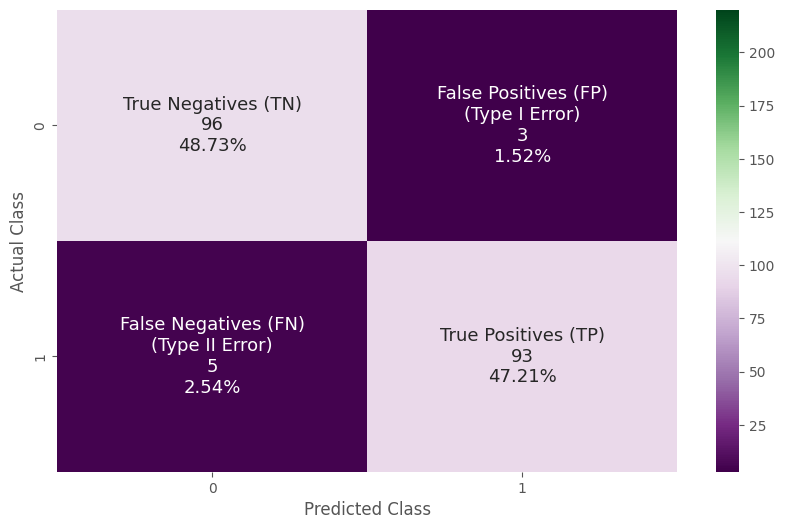

In [ ]:
plt.figure(figsize=(10,6))

cf_matrix = confusion_matrix(y_test_re, y_pred_lr)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)',
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='PRGn', vmax=220)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

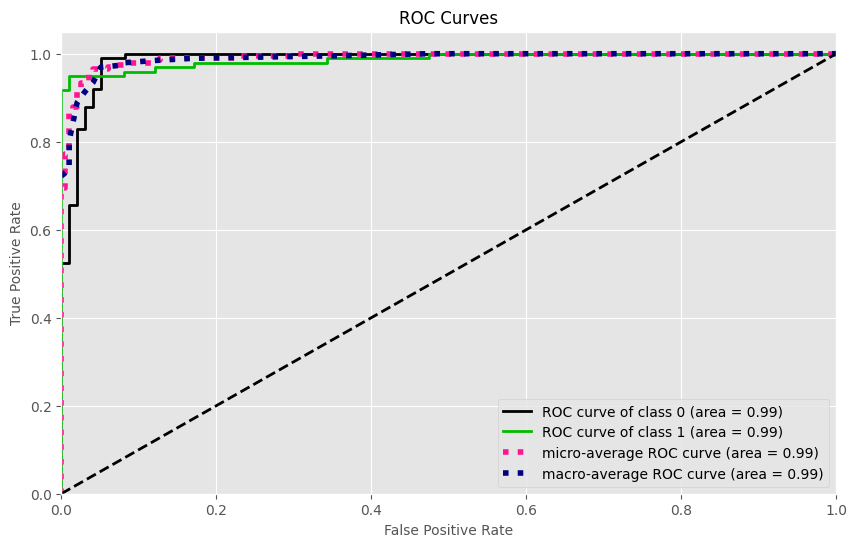

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

plot_roc(y_test_re, y_pred_proba_lr)
plt.show();

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
average_precision_score(y_test_re, y_pred_proba_lr[:,1])

0.9902350627534237

### Random Forest Classifier with Unbalanced Data Techniques
   

***i. Model Training***

In [ ]:
operations = [("scaler", StandardScaler()), ("random_forest", RandomForestClassifier())]

rf_model = Pipeline(steps=operations)

rf_model.fit(X_train_re, y_train_re)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest', RandomForestClassifier())])

***ii. Prediction and Model Evaluating and Tuning***

In [ ]:
y_pred_rf = rf_model.predict(X_test_re)
y_train_pred = rf_model.predict(X_train_re)

In [ ]:
y_pred_proba_rf = rf_model.predict_proba(X_test_re)
y_pred_proba_rf

array([[0.01, 0.99],
       [0.  , 1.  ],
       [0.73, 0.27],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.81, 0.19],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.07, 0.93],
       [0.03, 0.97],
       [0.81, 0.19],
       [0.75, 0.25],
       [0.97, 0.03],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.94, 0.06],
       [0.  , 1.  ],
       [0.89, 0.11],
       [0.  , 1.  ],
       [0.87, 0.13],
       [0.87, 0.13],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.92, 0.08],
       [0.94, 0.06],
       [0.  , 1.  ],
       [0.94, 0.06],
       [0.91, 0.09],
       [0.94, 0.06],
       [0.94, 0.06],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.4 , 0.6 ],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.68, 0.32],
       [0.85, 0.15],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.  , 1.  ],
       [0.  ,

In [ ]:
test_data = pd.concat([X_test_re, y_test_re], axis=1)
test_data["pred"] = y_pred_rf
test_data["pred_proba"] = y_pred_proba_rf[:,1]
test_data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,pred,pred_proba
831,102480.0,-1.929597,4.066413,-4.865184,5.898602,-0.552493,-1.555962,-3.833623,0.679512,-3.463765,...,-0.531765,-0.433409,0.378659,0.198107,0.869694,0.228048,0.00,1,1,0.99
295,170640.0,-0.882856,0.335240,0.436011,-1.530078,-0.918777,-0.896242,-0.305724,0.371352,1.429037,...,0.051488,0.101944,-0.449101,0.710826,-0.211621,0.036717,24.02,0,0,0.04
345,172461.0,0.903040,0.611959,-0.031053,1.146516,0.436582,-0.768603,0.739140,-0.562432,-0.237344,...,-0.195233,-0.027203,-0.235951,0.239123,-0.113865,-0.274497,7.99,0,0,0.15
503,7740.0,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,0.415382,...,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,1.00,1,1,0.99
956,155662.0,-1.928613,4.601506,-7.124053,5.716088,1.026579,-3.189073,-2.261897,1.185096,-4.441942,...,-0.354639,-0.701492,-0.030973,0.034070,0.573393,0.294686,0.77,1,1,1.00
524,12393.0,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,2.820829,...,0.193731,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,179.66,1,1,0.91
53,42465.0,1.130847,0.021917,0.251236,1.219267,-0.064776,0.300847,-0.131029,0.233507,0.272054,...,-0.103609,-0.326711,0.625496,-0.305773,0.024887,0.000604,15.17,0,0,0.00
105,131491.0,2.107217,-0.113591,-1.542073,0.220187,0.176512,-0.903322,0.110924,-0.265816,0.828292,...,-0.061144,-0.650658,0.292050,-0.055212,-0.020195,-0.066832,1.00,0,0,0.01
885,137211.0,0.630579,1.183631,-5.066283,2.179903,-0.703376,-0.103614,-3.490350,1.094734,-0.717418,...,0.102711,-0.601505,0.127371,-0.163009,0.853792,0.356503,39.45,1,1,1.00
236,28812.0,-0.330329,-0.075676,2.659665,-0.679939,-1.182843,-0.300209,-0.794417,0.084905,-1.084330,...,-0.231040,0.474899,-0.185687,0.075613,0.168542,0.132805,9.99,0,0,0.15


In [ ]:
eval_metric(rf_model, X_train_re, y_train_re, X_test_re, y_test_re)

Test_Set
[[95  4]
 [ 6 92]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        99
           1       0.96      0.94      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197


Train_Set
[[393   0]
 [  0 394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
operations = [("scaler", StandardScaler()), ("random_forest", RandomForestClassifier())]

rf_model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(rf_model, X_train_re, y_train_re, scoring = ['precision','recall','f1','accuracy'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.486365,0.013754,1.000000,1.0,0.897436,1.0,0.945946,1.0,0.949367,1.0
2,0.343730,0.014374,0.972222,1.0,0.897436,1.0,0.933333,1.0,0.936709,1.0
3,0.334947,0.014758,0.916667,1.0,0.846154,1.0,0.880000,1.0,0.886076,1.0
4,0.337631,0.014017,1.000000,1.0,0.825000,1.0,0.904110,1.0,0.911392,1.0
5,0.331574,0.012758,0.972222,1.0,0.875000,1.0,0.921053,1.0,0.924051,1.0
6,0.377904,0.023125,0.971429,1.0,0.850000,1.0,0.906667,1.0,0.911392,1.0
7,0.398769,0.016198,0.975000,1.0,0.975000,1.0,0.975000,1.0,0.974684,1.0
8,0.321342,0.012224,0.971429,1.0,0.871795,1.0,0.918919,1.0,0.923077,1.0
9,0.340375,0.012955,0.973684,1.0,0.948718,1.0,0.961039,1.0,0.961538,1.0
10,0.333423,0.012906,0.973684,1.0,0.948718,1.0,0.961039,1.0,0.961538,1.0


In [ ]:
df_scores.mean()[2:]

test_precision     0.972634
train_precision    1.000000
test_recall        0.893526
train_recall       1.000000
test_f1            0.930711
train_f1           1.000000
test_accuracy      0.933982
train_accuracy     1.000000
dtype: float64

***iii. Plot Precision and Recall Curve***


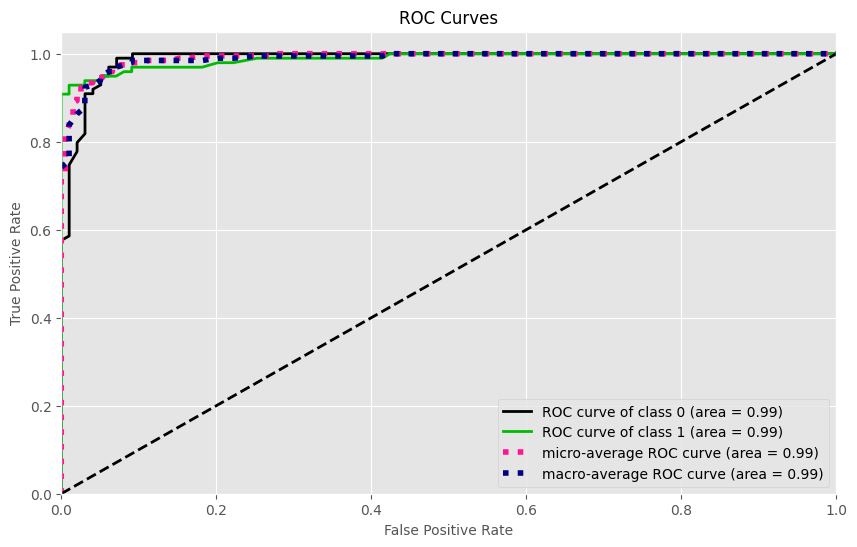

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
plot_roc(y_test_re, y_pred_proba_rf)
plt.show();

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve

average_precision_score(y_test_re, y_pred_proba_rf[:,1])

0.9903391878396336

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### XGBoost Classifier with Unbalanced Data Techniques

***i. Model Training***

In [ ]:
from xgboost import XGBClassifier
operations = [("scaler", StandardScaler()), ("XGB", XGBClassifier())]

xgb_model = Pipeline(steps=operations)

xgb_model.fit(X_train_re, y_train_re)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

***ii. Prediction and Model Evaluating and Tuning***

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_re)
y_train_pred = xgb_model.predict(X_train_re)

In [ ]:
y_pred_proba_xgb = xgb_model.predict_proba(X_test_re)
y_pred_proba_xgb

array([[1.26957893e-04, 9.99873042e-01],
       [4.68492508e-05, 9.99953151e-01],
       [9.94214892e-01, 5.78507921e-03],
       [1.55925751e-04, 9.99844074e-01],
       [9.99098361e-01, 9.01647378e-04],
       [1.25885010e-04, 9.99874115e-01],
       [7.56978989e-05, 9.99924302e-01],
       [1.38640404e-04, 9.99861360e-01],
       [9.99593854e-01, 4.06160339e-04],
       [9.99697685e-01, 3.02288157e-04],
       [5.44786453e-05, 9.99945521e-01],
       [9.99964774e-01, 3.52251991e-05],
       [9.98438179e-01, 1.56184076e-03],
       [6.57141209e-04, 9.99342859e-01],
       [8.84354115e-04, 9.99115646e-01],
       [9.72145140e-01, 2.78548524e-02],
       [9.78402436e-01, 2.15975903e-02],
       [9.97316420e-01, 2.68357247e-03],
       [8.78572464e-05, 9.99912143e-01],
       [1.73509121e-04, 9.99826491e-01],
       [9.99522746e-01, 4.77227266e-04],
       [4.95910645e-05, 9.99950409e-01],
       [9.97256160e-01, 2.74386047e-03],
       [3.36170197e-05, 9.99966383e-01],
       [9.997496

In [ ]:
test_data = pd.concat([X_test_re, y_test_re], axis=1)
test_data["pred"] = y_pred_xgb
test_data["pred_proba"] = y_pred_proba_xgb[:,1]
test_data.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,pred,pred_proba
485,141421.0,2.112766,-1.116445,-0.608063,-0.944910,-1.058612,-0.329735,-1.103612,0.035881,-0.017793,...,0.066095,-0.382160,-0.152958,-0.083228,-0.000569,-0.060031,29.95,0,0,0.000624
345,172461.0,0.903040,0.611959,-0.031053,1.146516,0.436582,-0.768603,0.739140,-0.562432,-0.237344,...,-0.195233,-0.027203,-0.235951,0.239123,-0.113865,-0.274497,7.99,0,0,0.030218
828,101597.0,0.913116,1.145381,-4.602878,2.091803,-0.473224,-2.085436,-1.671244,0.094397,0.337799,...,-0.197684,-0.283271,0.387597,-0.553527,0.516274,0.270828,147.87,1,1,0.999673
749,77182.0,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,...,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,1.00,1,1,0.999912
936,152098.0,-4.124316,3.748597,-7.926507,7.763242,-0.769375,-2.031171,-3.474549,0.107121,-1.551352,...,0.429939,-0.620601,-0.369688,0.367349,-2.664767,0.417101,1.00,1,1,0.999840
151,133324.0,1.999503,-0.104149,-1.009783,0.313397,-0.083446,-0.847568,0.083703,-0.177508,0.249253,...,0.340564,0.022583,-0.350220,0.177532,-0.070699,-0.068996,4.49,0,0,0.000428
654,48884.0,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1,1,0.999267
313,78280.0,1.436098,-0.587234,-0.021277,-1.000073,-0.550337,-0.161127,-0.666709,0.019460,-0.875270,...,-0.182668,-0.709184,0.584271,-0.158404,-0.006160,-0.005749,15.00,0,0,0.002553
189,119845.0,2.007687,0.209122,-1.779644,0.537178,0.291526,-1.389853,0.350848,-0.419127,0.464018,...,-0.054600,-0.132831,0.266639,-0.099159,0.002855,-0.024261,27.00,0,0,0.013065
106,89518.0,-0.966145,-0.863449,2.823818,1.407693,-0.459950,1.635631,-0.569612,0.559329,1.312259,...,0.106876,0.762117,-0.104385,-0.369272,0.032842,-0.040314,143.30,0,0,0.028785


In [ ]:
eval_metric(xgb_model, X_train_re, y_train_re, X_test_re, y_test_re)

Test_Set
[[96  3]
 [ 6 92]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        99
           1       0.97      0.94      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197


Train_Set
[[393   0]
 [  0 394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
operations = [("scaler", StandardScaler()), ("random_forest", RandomForestClassifier())]

xgb_model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(xgb_model, X_train_re, y_train_re, scoring = ['precision','recall','f1','accuracy'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.578086,0.024358,1.000000,1.0,0.897436,1.0,0.945946,1.0,0.949367,1.0
2,0.571066,0.022992,0.972222,1.0,0.897436,1.0,0.933333,1.0,0.936709,1.0
3,0.717935,0.023947,0.921053,1.0,0.897436,1.0,0.909091,1.0,0.911392,1.0
4,0.860390,0.069060,1.000000,1.0,0.825000,1.0,0.904110,1.0,0.911392,1.0
5,1.235420,0.038728,1.000000,1.0,0.875000,1.0,0.933333,1.0,0.936709,1.0
6,1.177654,0.057870,0.970588,1.0,0.825000,1.0,0.891892,1.0,0.898734,1.0
7,1.107739,0.046925,0.974359,1.0,0.950000,1.0,0.962025,1.0,0.962025,1.0
8,1.184922,0.048509,0.971429,1.0,0.871795,1.0,0.918919,1.0,0.923077,1.0
9,1.120092,0.030341,0.972973,1.0,0.923077,1.0,0.947368,1.0,0.948718,1.0
10,0.632825,0.044130,0.973684,1.0,0.948718,1.0,0.961039,1.0,0.961538,1.0


In [ ]:
df_scores.mean()[2:]

test_precision     0.975631
train_precision    1.000000
test_recall        0.891090
train_recall       1.000000
test_f1            0.930706
train_f1           1.000000
test_accuracy      0.933966
train_accuracy     1.000000
dtype: float64

***iii. Plot Precision and Recall Curve***


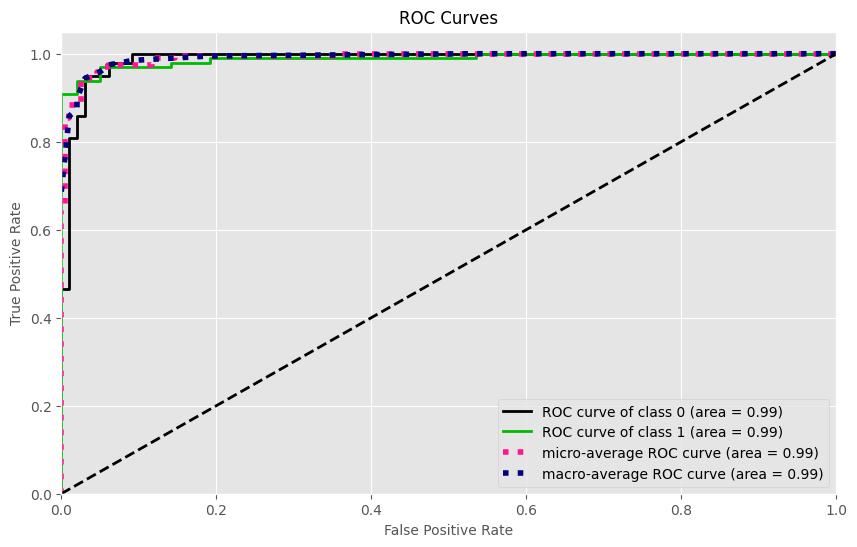

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
plot_roc(y_test_re, y_pred_proba_xgb)
plt.show();

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve

average_precision_score(y_test_re, y_pred_proba_xgb[:,1])

0.9912438186796295

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm.

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map.

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.optimizers import Adam



***ii. Define Model***

In [ ]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, stratify=y_under , test_size=0.3, random_state=42)

scaler = StandardScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
seed = 42


In [ ]:
import tensorflow as tf
from sklearn.metrics import f1_score
from keras import backend as K

# Define a custom F1 score metric
def f1_metric(y_true, y_pred):
    y_pred = K.round(y_pred)
    f1 = 2 * (K.sum(y_true * y_pred) + K.epsilon()) / (K.sum(y_true) + K.sum(y_pred) + K.epsilon())
    return f1



In [ ]:
tf.random.set_seed(seed)

model_ann = Sequential()

model_ann.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model_ann.add(Dense(15, activation = "relu"))
model_ann.add(Dense(1, activation = "sigmoid"))

***iii. Compile Model***

In [ ]:

# Compile the model using the custom F1 score metric
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_metric])


In [ ]:
model_ann.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=5, restore_best_weights = True)

***iv. Fit Model***

In [ ]:
model_ann.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), callbacks = [early_stop])


Epoch 1/10
6/6 [==============================] - 4s 279ms/step - loss: 0.5600 - f1_metric: 0.7378 - val_loss: 0.5480 - val_f1_metric: 0.7876
Epoch 2/10
6/6 [==============================] - 0s 36ms/step - loss: 0.5092 - f1_metric: 0.8099 - val_loss: 0.5055 - val_f1_metric: 0.8057
Epoch 3/10
6/6 [==============================] - 0s 32ms/step - loss: 0.4693 - f1_metric: 0.8553 - val_loss: 0.4701 - val_f1_metric: 0.8339
Epoch 4/10
6/6 [==============================] - 0s 28ms/step - loss: 0.4356 - f1_metric: 0.8694 - val_loss: 0.4393 - val_f1_metric: 0.8332
Epoch 5/10
6/6 [==============================] - 0s 29ms/step - loss: 0.4056 - f1_metric: 0.8741 - val_loss: 0.4118 - val_f1_metric: 0.8648
Epoch 6/10
6/6 [==============================] - 0s 51ms/step - loss: 0.3783 - f1_metric: 0.8800 - val_loss: 0.3869 - val_f1_metric: 0.8671
Epoch 7/10
6/6 [==============================] - 0s 49ms/step - loss: 0.3537 - f1_metric: 0.8739 - val_loss: 0.3647 - val_f1_metric: 0.8700
Epoch 8/10
6

***v. Prediction and Model Evaluating***

In [ ]:
loss_df = pd.DataFrame(model_ann.history.history)
loss_df.head()

,loss,f1_metric,val_loss,val_f1_metric
0,0.560033,0.737832,0.548046,0.787630
1,0.509206,0.809875,0.505524,0.805727
2,0.469321,0.855285,0.470100,0.833850
3,0.435595,0.869382,0.439289,0.833158
4,0.405578,0.874116,0.411753,0.864769


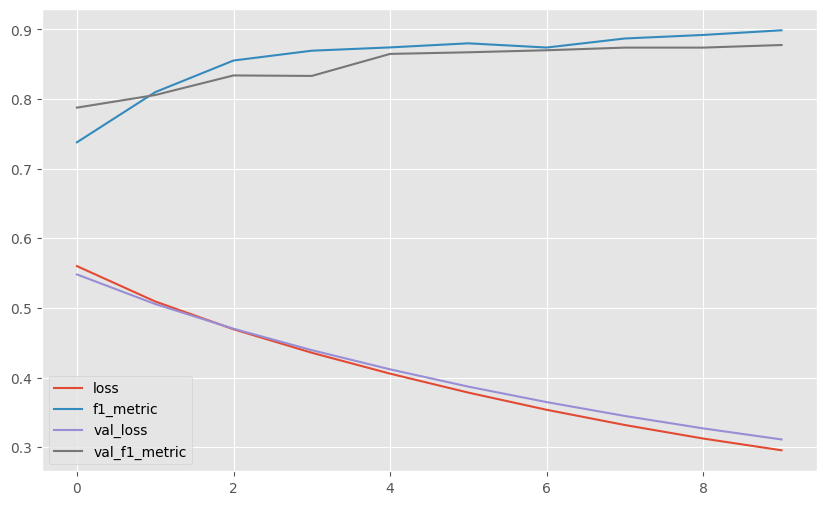

In [ ]:
loss_df.plot();


In [ ]:
model_ann.evaluate(X_test, y_test, verbose=0)


[0.31107139587402344, 0.8714747428894043]

In [ ]:
y_pred_ann = model_ann.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred_ann))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_ann))

10/10 [==============================] - 0s 4ms/step
[[146   2]
 [ 31 117]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       148
           1       0.98      0.79      0.88       148

    accuracy                           0.89       296
   macro avg       0.90      0.89      0.89       296
weighted avg       0.90      0.89      0.89       296



In [ ]:
y_train_pred = model_ann.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

22/22 [==============================] - 0s 5ms/step
[[342   2]
 [ 65 279]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       344
           1       0.99      0.81      0.89       344

    accuracy                           0.90       688
   macro avg       0.92      0.90      0.90       688
weighted avg       0.92      0.90      0.90       688



***vi. Plot Precision and Recall Curve***

10/10 [==============================] - 0s 5ms/step


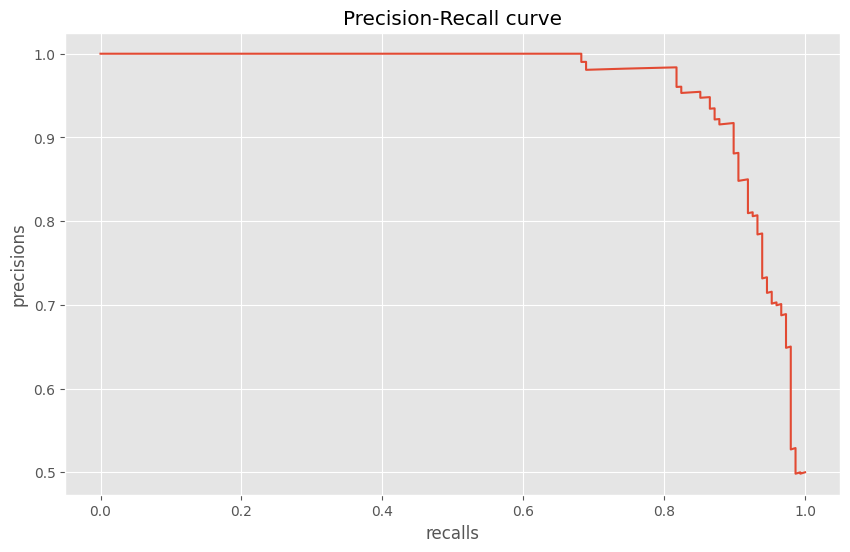

In [ ]:
y_pred_proba_ann = model_ann.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_ann)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba_ann)


0.9637841489294249

In [ ]:
# saving scores LR
from sklearn.metrics import roc_auc_score


log_f1 = f1_score(y_test_re, y_pred_lr)
log_pre = precision_score(y_test_re, y_pred_lr)
log_recall = recall_score(y_test_re, y_pred_lr)
log_precision_recall = average_precision_score(y_test_re, y_pred_proba_lr[:,1])

In [ ]:
# saving scores RF
from sklearn.metrics import roc_auc_score


rf_f1 = f1_score(y_test_re, y_pred_rf)
rf_pre = precision_score(y_test_re, y_pred_rf)
rf_recall = recall_score(y_test_re, y_pred_rf)
rf_precision_recall = average_precision_score(y_test_re, y_pred_proba_rf[:,1])

In [ ]:
# saving scores XGB
from sklearn.metrics import roc_auc_score


xgb_f1 = f1_score(y_test_re, y_pred_xgb)
xgb_pre = precision_score(y_test_re, y_pred_xgb)
xgb_recall = recall_score(y_test_re, y_pred_xgb)
xgb_precision_recall = average_precision_score(y_test_re, y_pred_proba_xgb[:,1])

In [ ]:
# saving ANN scores


ann_f1 = f1_score(y_test, y_pred_ann)
ann_pre = precision_score(y_test, y_pred_ann)
ann_recall = recall_score(y_test, y_pred_ann)
ann_precision_recall = average_precision_score(y_test, y_pred_proba_ann)


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
compare = pd.DataFrame({
            'Model': ['Logistic Regression',  'Random Forest', 'XGB Model','ANN Model'],
            'precision': [log_pre, rf_pre, xgb_pre, ann_pre],
            'recall': [log_recall, rf_recall, xgb_recall, ann_recall],
            'f1': [log_f1, rf_f1, xgb_f1,ann_f1],
            'precision_recall': [log_precision_recall, rf_precision_recall, xgb_precision_recall, ann_precision_recall]
})
compare

,Model,precision,recall,f1,precision_recall
0,Logistic Regression,0.968750,0.948980,0.958763,0.990235
1,Random Forest,0.958333,0.938776,0.948454,0.990339
2,XGB Model,0.968421,0.938776,0.953368,0.991244
3,ANN Model,0.983193,0.790541,0.876404,0.963784


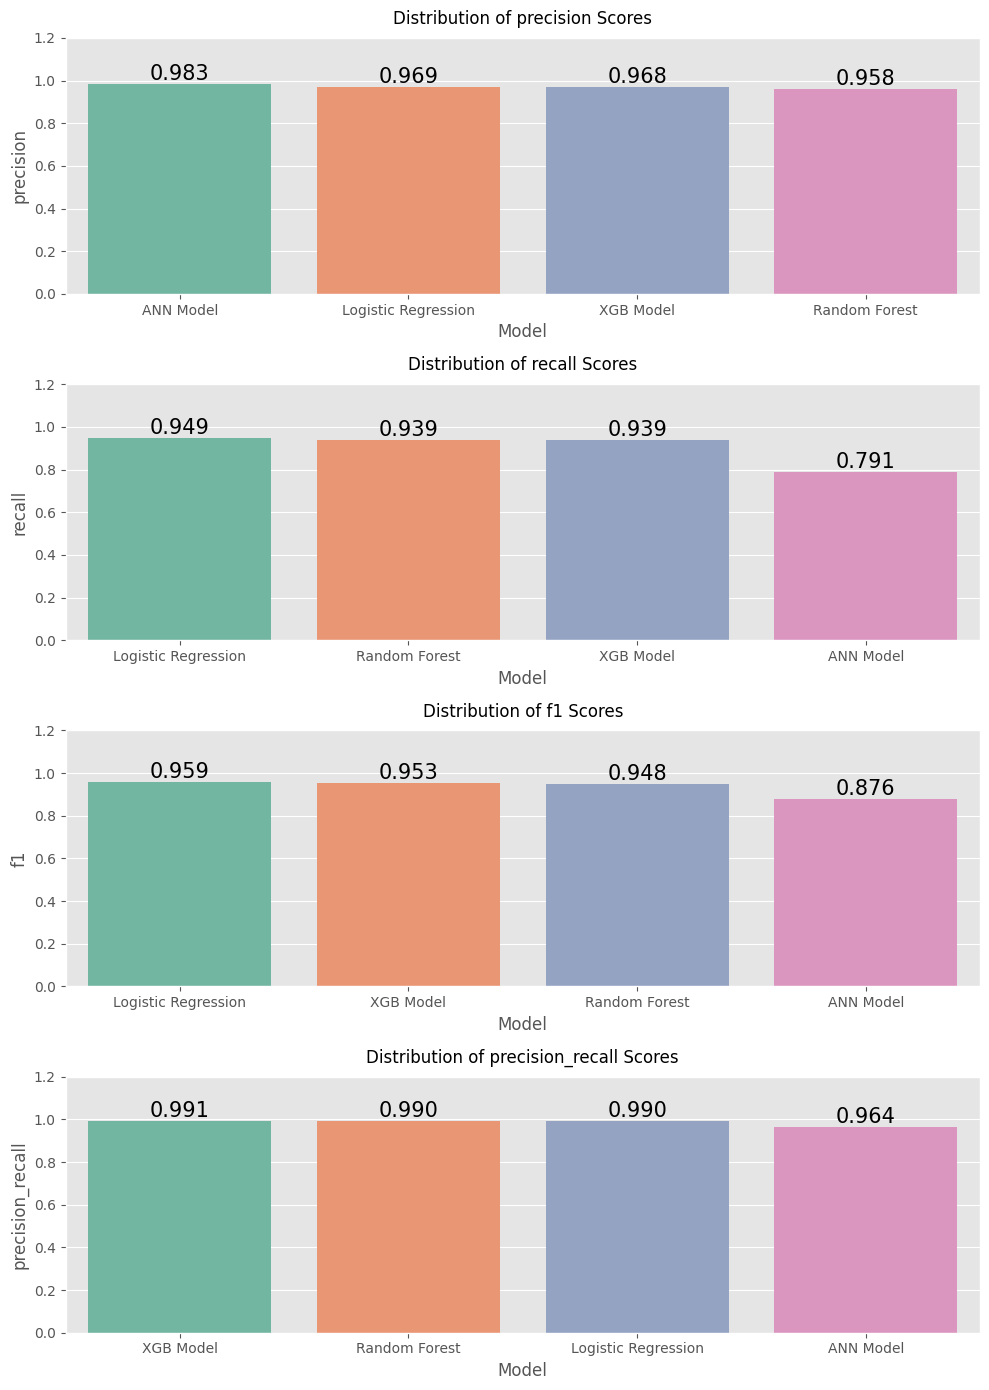

In [ ]:
plt.figure(figsize=(10,14))

index = 0

for col in compare.iloc[:, 1:].columns:
    index += 1
    plt.subplot(4,1,index)
    a = sns.barplot(data=compare.sort_values(col, ascending=False), x='Model', y=col, palette='Set2')
    a.bar_label(a.containers[0], fmt='%.3f', fontsize=15), plt.ylim(0, 1.2)
    plt.title(f'Distribution of {col} Scores', fontsize=12, pad=10)
plt.tight_layout()

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


In [ ]:
import pickle


In [ ]:
pickle.dump(pipe_model, open("lr_model", "wb"))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___